# 绘图和可视化

In [88]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


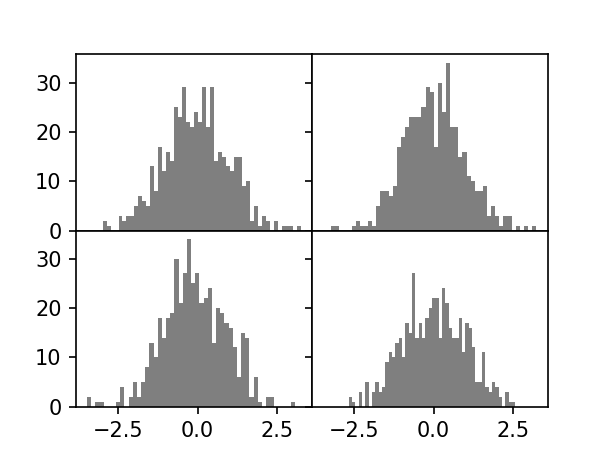

In [127]:
#subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=None)
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

<IPython.core.display.Javascript object>


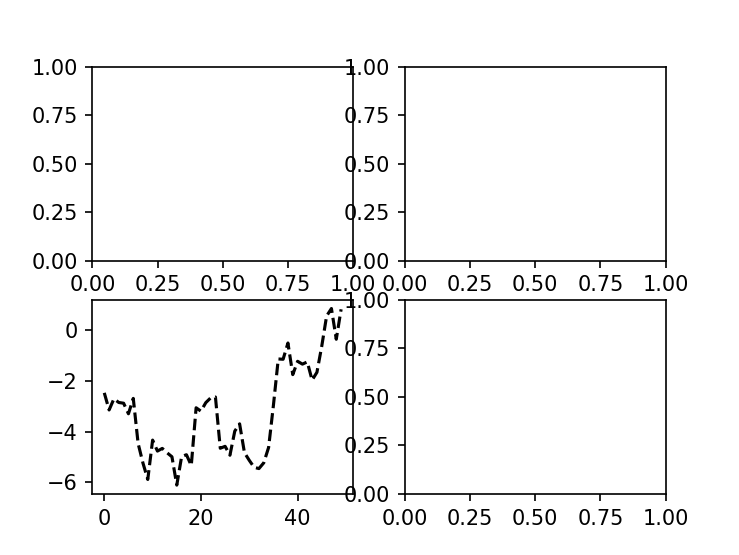

In [129]:
fig,axes=plt.subplots(2,2)
from numpy.random import randn
axes[1,0].plot(randn(50).cumsum(),'k--')

<IPython.core.display.Javascript object>


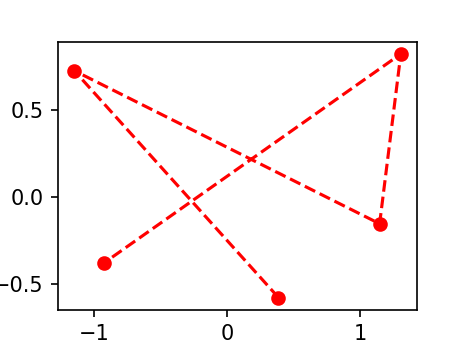

In [115]:
plt.figure()
plt.plot(randn(5),randn(5),'ro--')  #o表示点的标记

<IPython.core.display.Javascript object>


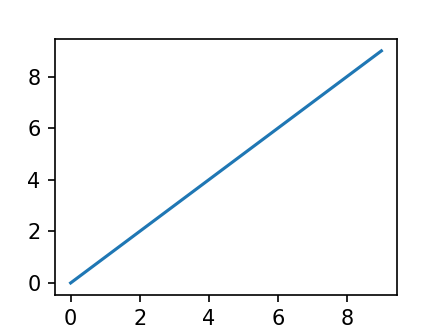

In [116]:
plt.figure()   #不创建一个新图就会在刚刚操作的图上绘画
plt.plot(range(10))   #plt.plot  可画一个变量的图，也可画两个变量的图

<IPython.core.display.Javascript object>


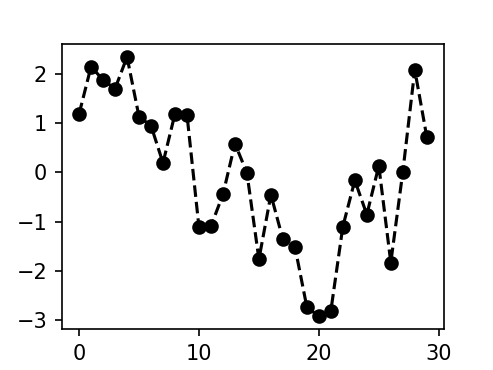

In [122]:
plt.figure()
plt.plot(randn(30).cumsum(),'ko--')

<IPython.core.display.Javascript object>


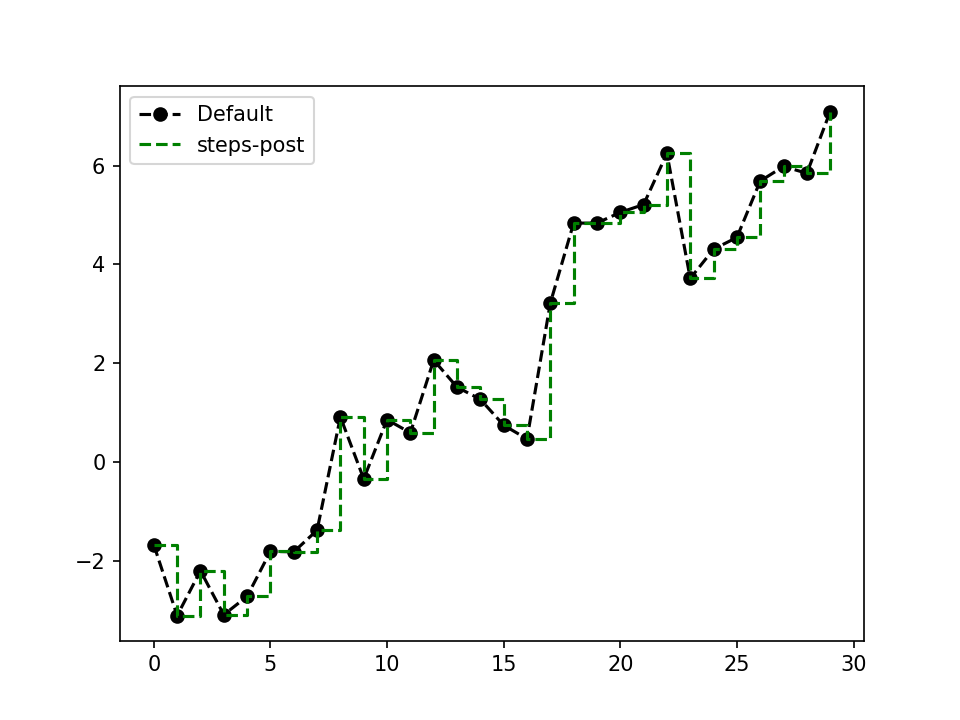

In [139]:
plt.figure()
data=randn(30).cumsum()
plt.plot(data,'ko--',label='Default')

In [140]:
plt.plot(data,'g--',drawstyle='steps-post',label='steps-post')   #对缺失值默认是直线连接，drawstyle='steps-post'表示先走横线后走竖线
plt.legend(loc='best')

<IPython.core.display.Javascript object>


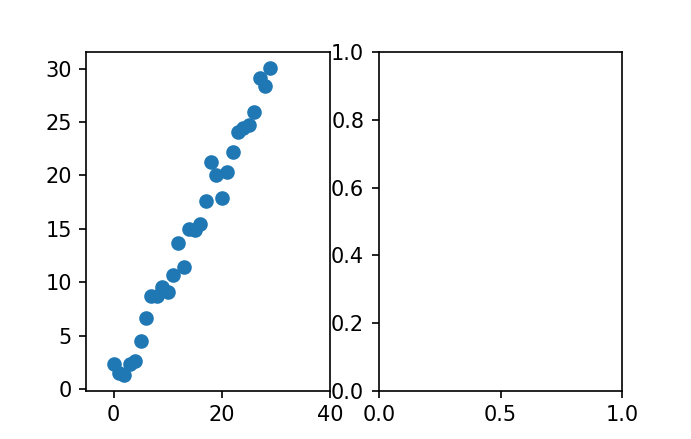

In [150]:
import numpy as np
fig,axes=plt.subplots(1,2)
axes[0].scatter(np.arange(30),np.arange(30)+randn(30))   #注意表达式axes[0]

In [152]:
axes[0].get_xlim()

(-1.4646370967741933, 30.46463709677419)

In [154]:
axes[0].set_xlim([-5,40])

(-5, 40)

### 设置标题、轴标签、刻度及刻度标签

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


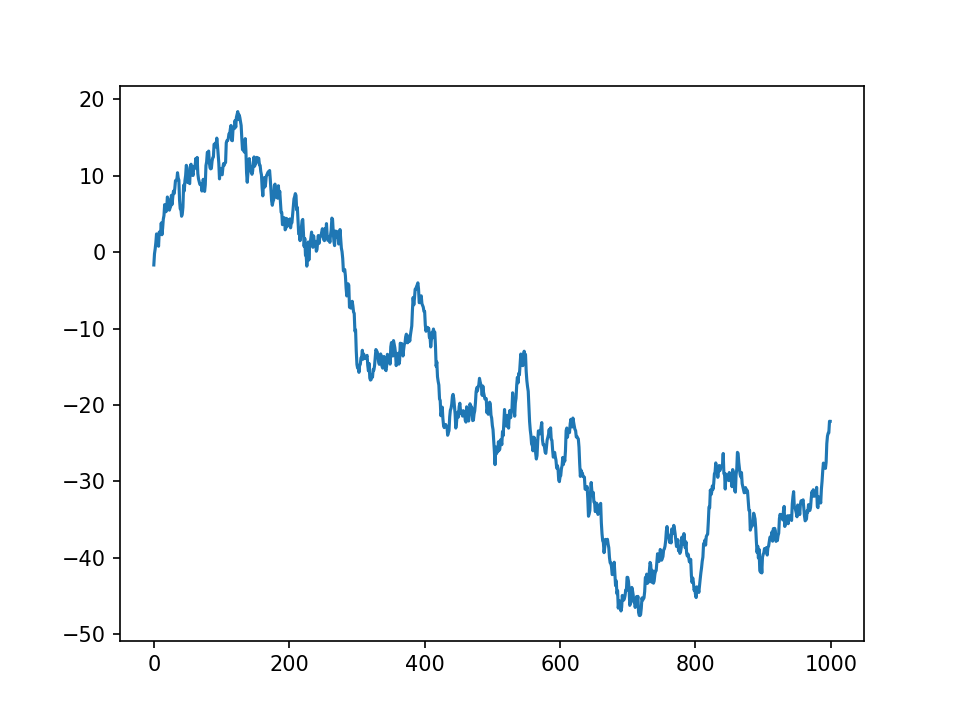

In [17]:
from numpy.random import randn
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),label='one')

In [9]:
ticks=ax.set_xticks([0,250,500,750,1000])
labels=ax.set_xticklabels(['one','two','three','four','five'],rotation=10,fontsize='small')
# fontsize='small','medium','large'

In [10]:
ax.set_title('my first')
ax.set_xlabel('stages',fontsize='small')

Text(0.5,18.5587,u'stages')

In [11]:
ax.set_ylabel('cumsum')

Text(32.4583,0.5,u'cumsum')

In [13]:
ax.legend(loc='best')

In [15]:
plt.savefig('figpath.png',dpi=400,bbox_inches='tight')   #保存图片的方式

<IPython.core.display.Javascript object>


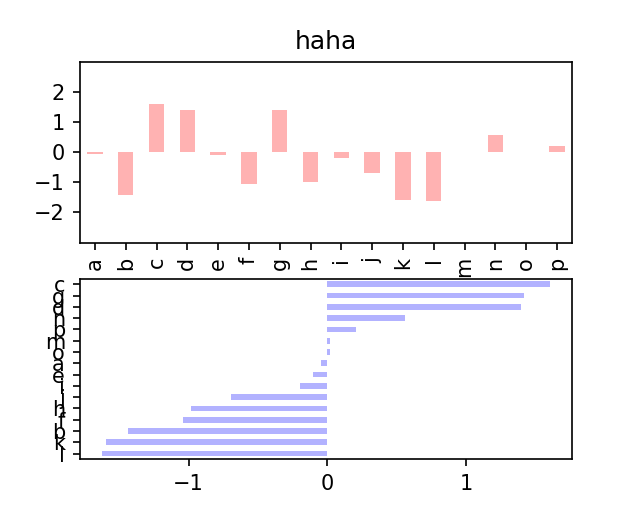

In [28]:
fig,axes=plt.subplots(2,1)
data=pd.Series(randn(16),index=list('abcdefghijklmnop'))
data.sort_values().plot(kind='barh',color='b',ax=axes[1],alpha=0.3)

In [29]:
data.plot(kind='bar',ax=axes[0],color='r',alpha=0.3)

In [27]:
axes[0].set_ylabel('num')
axes[1].set_ylabel('word')

Text(76.8333,0.5,u'word')

In [30]:
axes[0].set_yticks([-2,-1,0,1,2])

In [31]:
axes[0].set_ylim([-3,3])

(-3, 3)

In [32]:
axes[0].set_title('haha')

Text(0.5,1,u'haha')

<IPython.core.display.Javascript object>


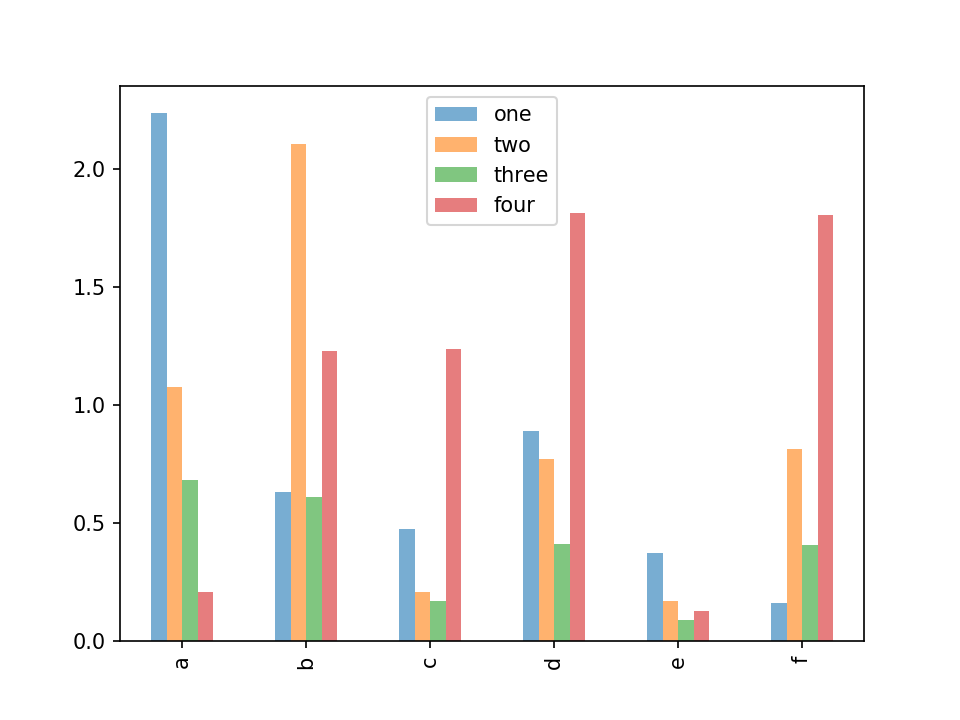

In [75]:
df=pd.DataFrame(np.abs(randn(6,4)),index=list('abcdef'),columns=['one','two','three','four'])
df.plot(kind='bar',alpha=0.6)    #以index作为一个类别作图，columns只有stack和unstack的区别

<IPython.core.display.Javascript object>


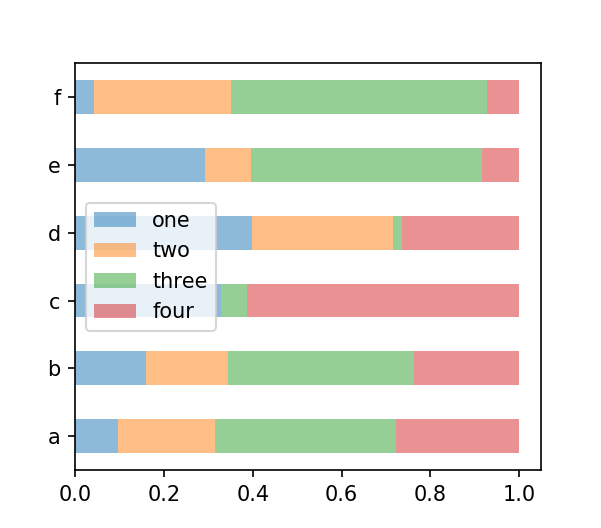

In [41]:
df1=df.div(df.sum(1),axis=0)   #axis=1一般表示横向操作。   div处axis=0与其他处的理解相反。
#可理解为df.sum(1)之后的结果为Series，是纵向的。所以操作起来为每一行的一个数与sum(1)相较，从首行到末行，操作是纵向的，axis=0
df1.plot(kind='barh',stacked=True,alpha=0.5)  #stacked=True非常重要

In [59]:
tips=pd.read_csv('pydata-book-2nd-edition/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [66]:
#计算'day'和'size'各值的累计
s=tips.groupby(['day','size'])['tip'].count()
party_counts=s.unstack().fillna(0)

In [68]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1.0,16.0,1.0,1.0,0.0,0.0
Sat,2.0,53.0,18.0,13.0,1.0,0.0
Sun,0.0,39.0,15.0,18.0,3.0,1.0
Thur,1.0,48.0,4.0,5.0,1.0,3.0


<IPython.core.display.Javascript object>


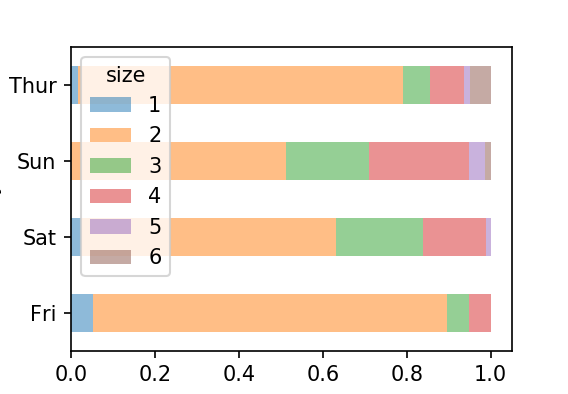

In [70]:
party_counts1=party_counts.div(party_counts.sum(1).astype(float),axis=0)
party_counts1.plot(kind='barh',stacked=True,alpha=0.5)

<IPython.core.display.Javascript object>


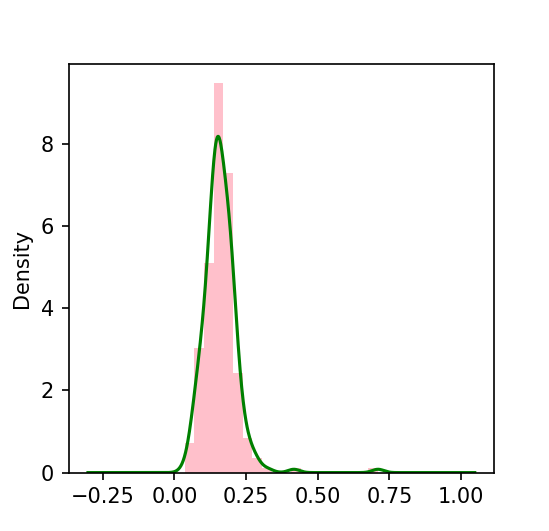

In [98]:
plt.figure()
tips['tip_pct']=tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=20,color='pink',normed=True)  
#直方图以规格化形式(即normed=True)给出后方便给出kde曲线

In [99]:
tips['tip_pct'].plot(kind='kde',c='g')

#### diff用法

In [111]:
s=pd.DataFrame({'num':np.arange(10),
                'num1':np.arange(10,30,2),
                'num2':np.arange(10,40,3)})
s.diff()[:3]   #diff表示做差，缺省是与前一项做差

,num,num1,num2
0,NaN,NaN,NaN
1,1.0,2.0,3.0
2,1.0,2.0,3.0


In [112]:
s.diff(2)[:4]

,num,num1,num2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,2.0,4.0,6.0
3,2.0,4.0,6.0


In [113]:
s.diff(axis=1)[:2]

,num,num1,num2
0,NaN,10.0,0.0
1,NaN,11.0,1.0


<IPython.core.display.Javascript object>


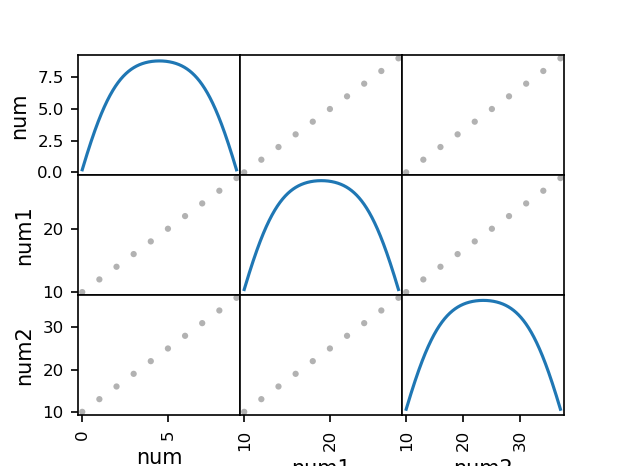

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000234EFB38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000248120F0>]], dtype=object)

In [118]:
pd.plotting.scatter_matrix(s,diagonal='kde',color='k',alpha=0.3)

In [137]:
data=pd.read_csv('pydata-book-2nd-edition/datasets/haiti/Haiti.csv')
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [138]:
data=data[(data.LATITUDE>18)&(data.LATITUDE<20)&(data.LONGITUDE>-75)
          &(data.LONGITUDE<-70)&data.CATEGORY.notnull()]

In [140]:
def to_cat_list(catstr):
    stripped=(x.strip() for x in catstr.split(','))  #先去除空格，后检验x是否为空
    return [x for x in stripped if x]
def get_all_categories(catstr):
    cattt=(set(to_cat_list(x)) for x in catstr)
    return sorted(set.union(*cattt))
def get_english(catstr):
    code,names=catstr.split('.')
    if '|' in names:
        names=names.split('|')[1]
    return code,names.strip()

In [141]:
all_cats=get_all_categories(data.CATEGORY)
english_mapping=dict(get_english(x) for x in all_cats)
english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [142]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]
all_codes=get_code(all_cats)
code_index=pd.Index(np.unique(all_codes))   #注意all_codes是list，故求独一的用法是np.unique(all_codes)
dummy_frame=pd.DataFrame(np.zeros((len(data),len(code_index))),index=data.index,columns=code_index)

In [146]:
dummy_frame.head()

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i,x in zip(data.index,data.CATEGORY):
    codes=get_code(to_cat_list(x))
    dummy_frame.ix[i,codes]=1
data=data.join(dummy_frame.add_prefix('category_'))

In [152]:
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
data1=data.drop(['Serial','INCIDENT TITLE','DESCRIPTION','CATEGORY','APPROVED','VERIFIED'],axis=1)
data1.head()

,INCIDENT DATE,LOCATION,LATITUDE,LONGITUDE,category_1,category_1a,category_1b,category_1c,category_1d,category_2,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,05/07/2010 17:26,"Jacmel, Haiti",18.233333,-72.533333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18/05/2010 16:26,"Citi Soleil, Haiti",18.571084,-72.334671,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",18.593707,-72.310079,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,26/04/2010 14:19,Marc near Baraderes,18.482800,-73.638800,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,18.415000,-73.195000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
